Contoh data produksi:
    Cacat_Material  Kesalahan_Proses  Kesalahan_Rakit  Kesalahan_Ukur  Gagal_QC
0               0                 0                1               0         0
1               1                 0                0               0         0
2               0                 0                1               1         1
3               0                 0                0               0         0
4               0                 0                0               0         0

Akurasi model: 1.0

Confusion Matrix:
 [[ 5  0]
 [ 0 13]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



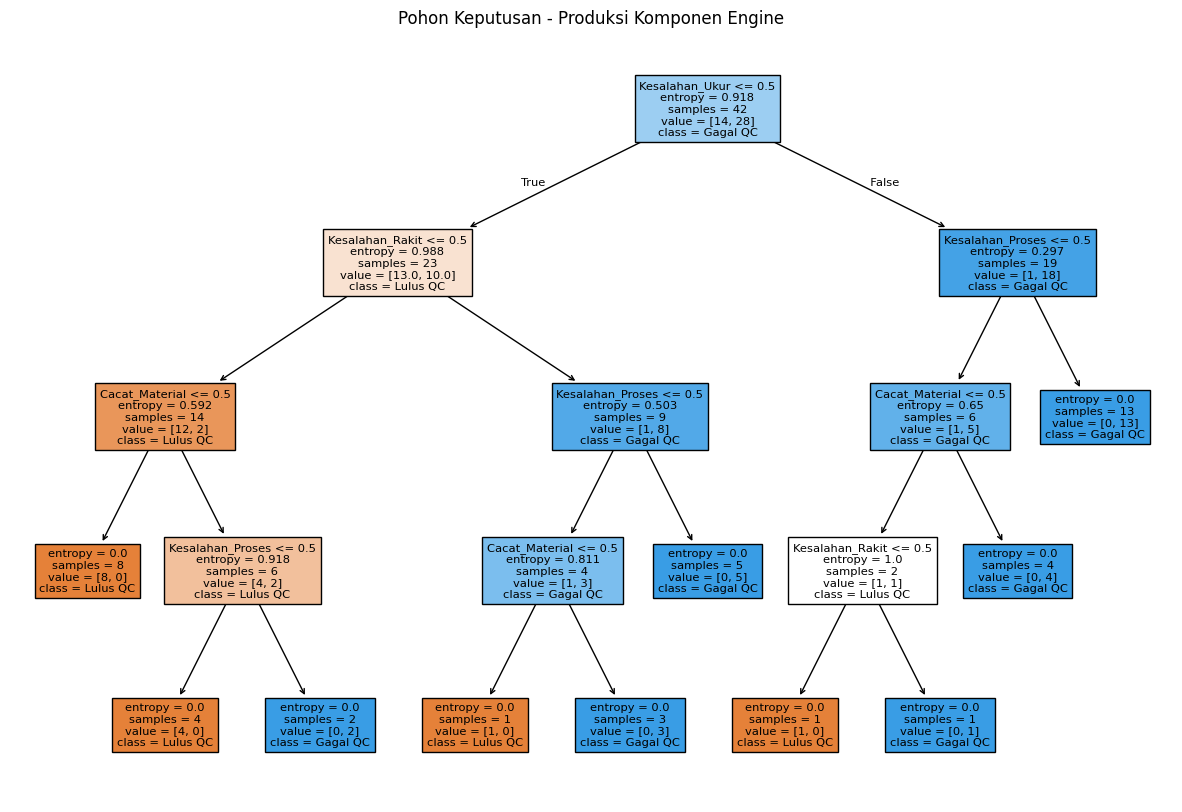

In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Membuat data dummy untuk produksi komponen engine
np.random.seed(42)  # Supaya hasil random konsisten

# Jumlah data
jumlah_data = 60

# Membuat data acak
data = {
    'Cacat_Material': np.random.choice([0, 1], size=jumlah_data),
    'Kesalahan_Proses': np.random.choice([0, 1], size=jumlah_data),
    'Kesalahan_Rakit': np.random.choice([0, 1], size=jumlah_data),
    'Kesalahan_Ukur': np.random.choice([0, 1], size=jumlah_data),
}

# Membuat dataframe
df = pd.DataFrame(data)

# Aturan sederhana:
# Jika ada 2 atau lebih kesalahan, maka produk gagal QC
df['Gagal_QC'] = ((df['Cacat_Material'] + df['Kesalahan_Proses'] + df['Kesalahan_Rakit'] + df['Kesalahan_Ukur']) >= 2).astype(int)

# Menampilkan 5 data pertama
print("Contoh data produksi:\n", df.head())

# Memisahkan fitur dan target
X = df[['Cacat_Material', 'Kesalahan_Proses', 'Kesalahan_Rakit', 'Kesalahan_Ukur']]
y = df['Gagal_QC']

# Membagi data menjadi data latih dan data uji (70% latih, 30% uji)
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_latih, y_latih)

# Prediksi hasil
y_prediksi = model.predict(X_uji)

# Menampilkan akurasi model
print("\nAkurasi model:", model.score(X_uji, y_uji))

# Menampilkan confusion matrix dan classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_uji, y_prediksi))
print("\nLaporan Klasifikasi:\n", classification_report(y_uji, y_prediksi))

# Visualisasi Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['Lulus QC', 'Gagal QC'], filled=True)
plt.title('Pohon Keputusan - Produksi Komponen Engine')
plt.show()

